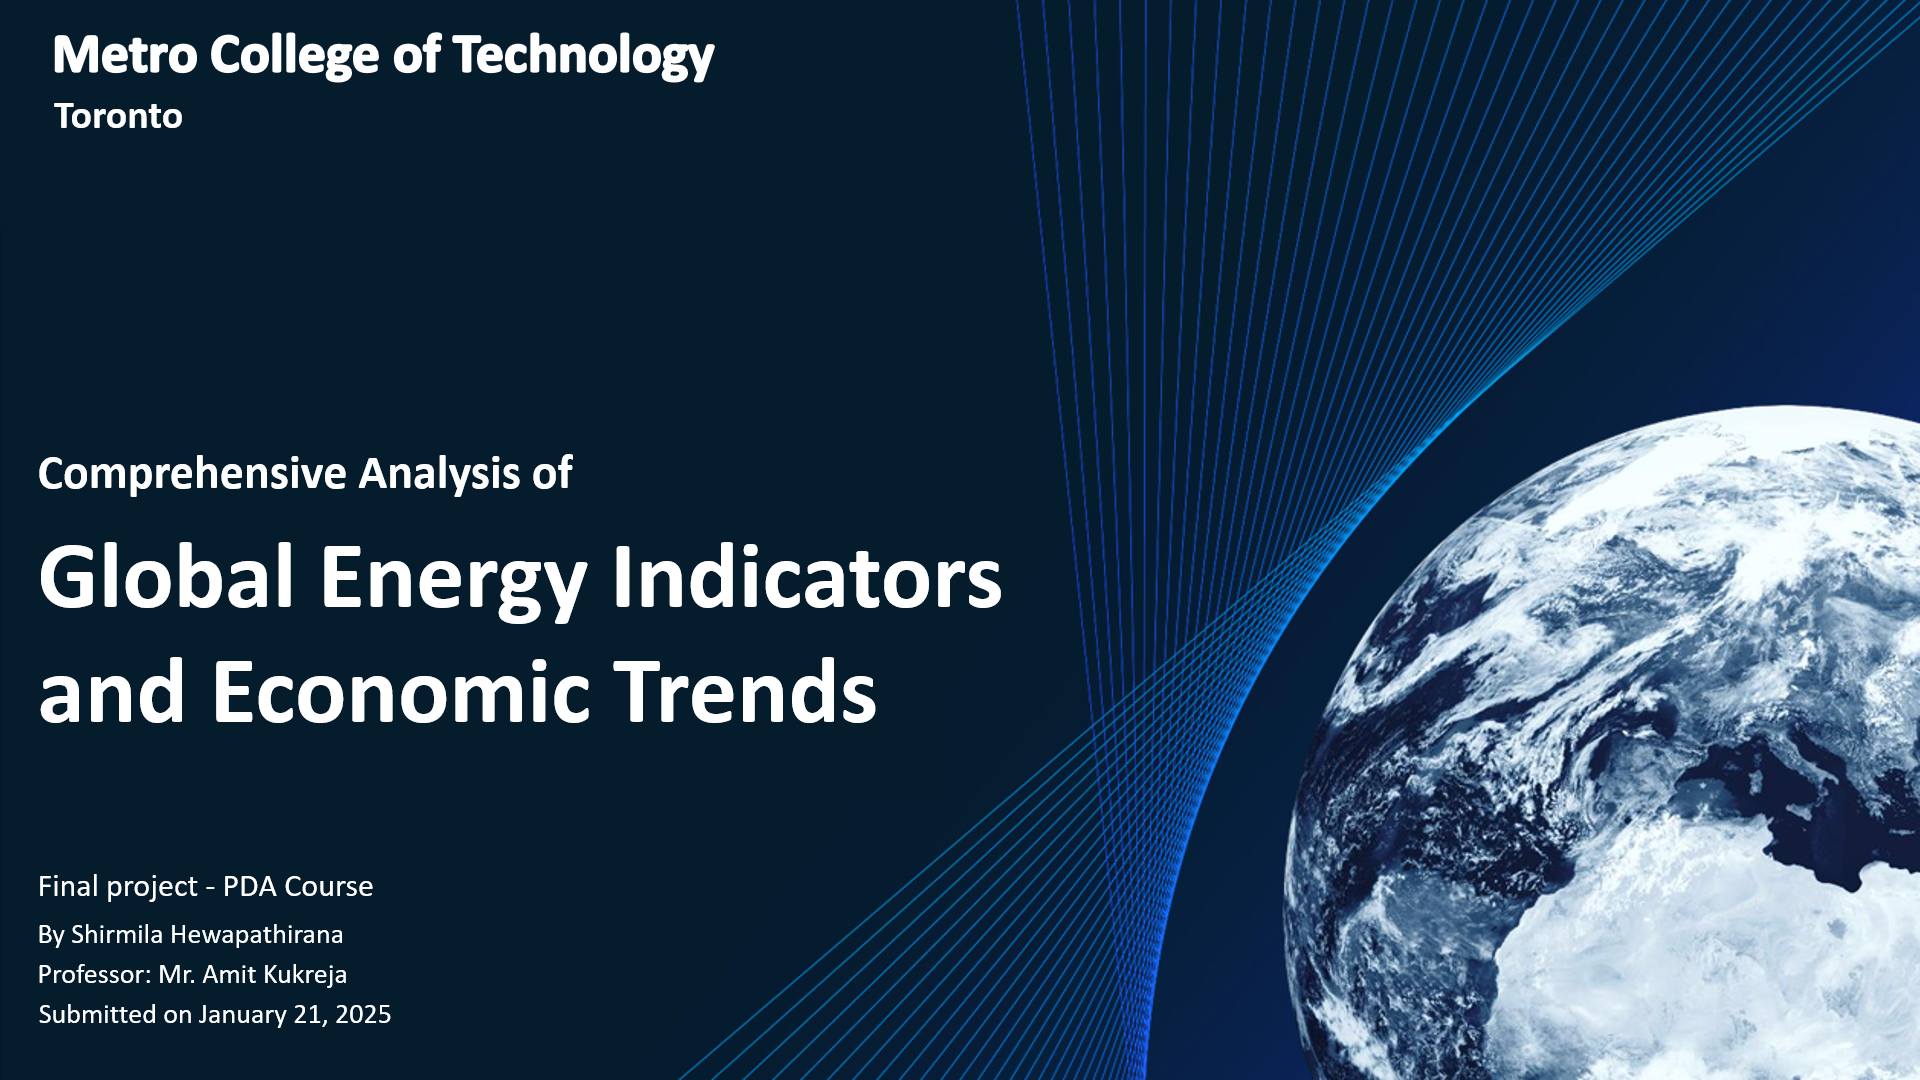

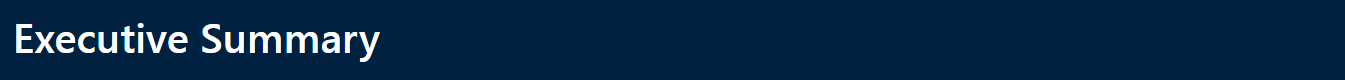

This project presents a comprehensive analysis of the relationship between energy consumption, economic performance, and scientific output across the world's leading nations. 

The analysis combines data from three primary sources:

1. United Nations Energy Indicators (2013) (Ref: http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) 
2. World Bank GDP Data (2006-2015) (Ref: http://data.worldbank.org/indicator/NY.GDP.MKTP.CD)
3. Scimago Journal Rankings for Energy Engineering and Power Technology (Ref: http://www.scimagojr.com/countryrank.php?category=2102)


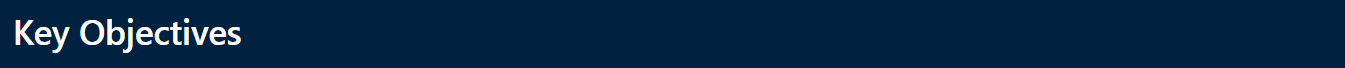

The analysis focused on the top 15 countries by scientific research rank and examined multiple aspects including:

- Energy supply and consumption patterns
- GDP trends over a 10-year period
- Scientific research output and impact
- Renewable energy adoption
- Population estimates and their correlation with research output


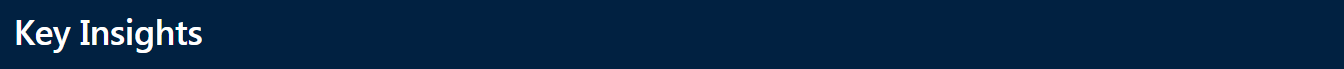

The findings indicate that;
-  Asia accounts for the majority of the world's population, while the United States leads in GDP.
-  Brazil demonstrates a strong commitment to renewable energy.
-  A significant positive correlation between energy supply per capita and research output suggests that higher energy availability is linked to greater academic productivity across countries.

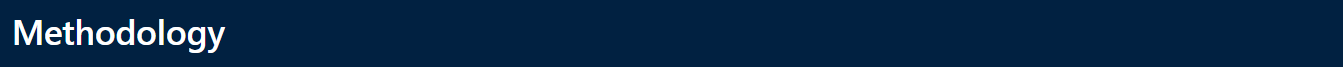

The project involved extensive data cleaning and transformation, including:
- Standardization of country names across datasets
- Conversion of energy units to gigajules
- Creation of derived metrics for per-capita analysis
- Implementation of bining and grouping operations for categorical analysis

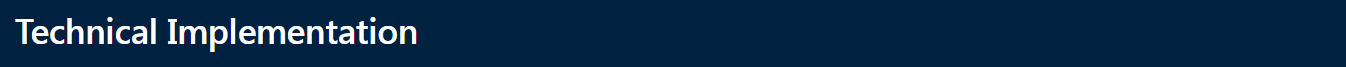

The analysis was conducted using Python, leveraging key data science libraries including:
- Pandas for data manipulation and analysis(reference: https://pandas.pydata.org/docs/)
- NumPy for numerical computations(reference: https://numpy.org/doc/)
- Matplotlib/Seaborn for data visualization (reference: https://matplotlib.org/stable/users/index.html)

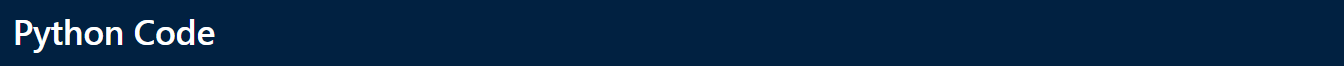

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')

# Q1)

## a)

Read the energy data from the file Energy Indicators.xls, which is a list of indicators of [energy supply and renewable electricity production] from the [United Nations (http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013,and should be put into a Data Frame with the **variable name of energy**.

Keep in mind that this is an Excel file, and not a comma separated values file.
Also, make sure to,
-  Exclude the footer and header information from the data file.
-  The first two columns are unnecessary, so you should get rid of them, and
-  You should change the column labels so that the columns are;\
    ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable’]


#### Comments:
Read energy data from the file **'Energy Indicators.xls'** \
When I tried to read this '.xls' file for the first time the following error occoured: \
ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd. \
So, to fix this I installed 'conda' by running the command 'conda install -c anaconda xlrd' on 'Anaconda Prompt' as Administrator.\
Since I have 'EnergyIndicators.xls' in the same file folder as my notebook I did not need to input the file path of the '.xls' file in the code. \
Otherwise I need to give the full file path in the code as noted below,

```python
energy = pd.read_excel(r"D:\1.Data Science Course\8.Python\py_project\EnergyIndicators.xls", skiprows=17, skipfooter=38, usecols="C:F")

In [2]:
# Exclude the footer and header information from the data file.
# The first two columns are unnecessary, so you should get rid of them
energy = pd.read_excel('EnergyIndicators.xls', skiprows=17, skipfooter=38, usecols="C:F")
energy.info

<bound method DataFrame.info of                     Unnamed: 2 Petajoules Gigajoules           %
0                  Afghanistan        321         10   78.669280
1                      Albania        102         35  100.000000
2                      Algeria       1959         51    0.551010
3               American Samoa        ...        ...    0.641026
4                      Andorra          9        121   88.695650
..                         ...        ...        ...         ...
222                   Viet Nam       2554         28   45.321520
223  Wallis and Futuna Islands          0         26    0.000000
224                      Yemen        344         13    0.000000
225                     Zambia        400         26   99.714670
226                   Zimbabwe        480         32   52.536120

[227 rows x 4 columns]>

In [3]:
# Rename the columns
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650


## b)

Convert variable Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as NA values.

In [4]:
# replace missing data (e.g. data with "...").
energy.replace('...', pd.NA, inplace=True)
#energy.replace('...', np.nan, inplace = True)
#convert variable Energy Supply to gigajoules
energy['Energy Supply'] *= 1000000

print(energy.dtypes)
energy.head(5)

Country                      object
Energy Supply                object
Energy Supply per Capita     object
% Renewable                 float64
dtype: object


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000,10,78.669280
1,Albania,102000000,35,100.000000
2,Algeria,1959000000,51,0.551010
3,American Samoa,<NA>,<NA>,0.641026
4,Andorra,9000000,121,88.695650


## c)

Rename the following list of countries.

"Republic of Korea" to "South Korea",\
"United States of America" to "United States",\
"United Kingdom of Great Britain and Northern Ireland" to "United Kingdom", \
"China, Hong Kong Special Administrative Region" to "Hong Kong"

There are also several countries with parenthesis in their name. Be sure to remove these, \
e.g.'Bolivia (Plurinational State of)' should be 'Bolivia'.

#### Comments:
In this question first I need to clean the country names by,
1. Removing any digits.
2. All text within the parantheses including parantheses.

and then apply the dictionary to energy df to rename the country names.

In [7]:
# clean country names by removing dignts 
energy['Country'] = energy['Country'].str.replace(r'\d+', '', regex=True)
# remove all text withinthe parantheses including parantheses
energy['Country'] = energy['Country'].str.replace(r'\(.*\)', '', regex=True).str.strip()

# Rename the following list of countries first
dict_energy_Country = {
                "Republic of Korea" : "South Korea",
                "United States of America" : "United States",
                "United Kingdom of Great Britain and Northern Ireland" : "United Kingdom",
                "China, Hong Kong Special Administrative Region" : "Hong Kong"
               }

energy['Country'] = energy['Country'].replace(dict_energy_Country)

# let's check country names
energy['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Hong Kong',
       'China, Macao Special Administrative Region', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
      

## d)

Next, load the GDP data from the file world_bank.csv, which is a csv containing countries 'GDP from 1960 to 2015 from [World Bank] (http://data.worldbank.org/indicator/NY.GDP.MKTP.CD).
-  Call this Data Frame GDP.
-  Make sure to skip the header, and
-  Rename the following list of countries:
    
    "Korea, Rep." to "South Korea",\
    "Iran, Islamic Rep." to "Iran",\
    "Hong Kong SAR, China" to "Hong Kong"


In [8]:
# Exclude the header information from the data file.
# The first two columns are unnecessary, so you should get rid of them
GDP = pd.read_csv('world_bank.csv', skiprows=4)
GDP.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
33,Canada,CAN,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,3.163370e+11,3.263436e+11,3.495688e+11,3.676827e+11,3.923154e+11,4.183516e+11,4.458999e+11,4.588993e+11,4.831996e+11,5.086159e+11,5.251744e+11,5.467993e+11,5.765772e+11,6.167312e+11,6.394947e+11,6.511525e+11,6.850079e+11,7.086970e+11,7.367160e+11,7.647475e+11,7.812861e+11,8.086554e+11,7.827621e+11,8.031027e+11,8.506894e+11,8.909617e+11,9.102227e+11,9.475096e+11,9.894786e+11,1.012474e+12,1.014037e+12,9.924813e+11,1.001245e+12,1.027830e+12,1.074015e+12,1.102774e+12,1.120541e+12,1.168498e+12,1.213856e+12,1.276530e+12,1.342688e+12,1.366465e+12,1.407596e+12,1.432964e+12,1.477185e+12,1.524476e+12,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
37,Chile,CHL,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,2.793838e+10,2.906986e+10,3.057948e+10,3.244990e+10,3.331562e+10,3.345460e+10,3.680060e+10,3.814043e+10,3.957134e+10,4.094498e+10,4.181405e+10,4.558483e+10,4.521140e+10,4.297746e+10,4.404925e+10,3.904403e+10,4.037402e+10,4.388552e+10,4.716067e+10,5.125531e+10,5.543190e+10,5.805788e+10,5.206443e+10,5.009298e+10,5.408706e+10,5.793764e+10,6.118004e+10,6.521438e+10,6.998233e+10,7.737270e+10,8.023361e+10,8.662822e+10,9.726438e+10,1.040595e+11,1.099994e+11,1.216897e+11,1.307111e+11,1.393453e+11,1.438474e+11,1.427529e+11,1.491708e+11,1.541653e+11,1.575059e+11,1.637381e+11,1.736296e+11,1.832825e+11,1.913560e+11,2.012316e+11,2.078570e+11,2.057027e+11,2.175383e+11,2.302417e+11,2.428063e+11,2.524617e+11,2.571989e+11,2.625130e+11
56,Dominican Republic,DOM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4.210329e+09,4.112934e+09,4.814076e+09,5.127130e+09,5.473974e+09,4.790721e+09,5.435713e+09,5.616588e+09,5.630004e+09,6.243193e+09,7.381120e+09,8.183556e+09,9.034168e+09,1.019919e+10,1.081134e+10,1.137280e+10,1.213797e+10,1.274266e+10,1.301544e+10,1.360522e+10,1.468939e+10,1.531808e+10,1.557828e+10,1.629924e+10,1.650345e+10,1.615316e+10,1.672207e+10,1.841391e+10,1.881090e+10,1.963869e+10,1.856753e+10,1.874283e+10,2.071330e+10,2.220935e+10,2.272088e+10,2.396908e+10,2.567841e+10,2.773378e+10,2.967808e+10,3.167107e+10,3.346258e+10,3.406799e+10,3.603992e+10,3.594861e+10,3.642024e+10,3.979375e+10,4.404021e+10,4.777245e+10,4.927428e+10,4.973538e+10,5.386448e+10,5.538394e+10,5.684026e+10,5.955594e+10,6.392787e+10,6.837298e+10
82,Guinea,GIN,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.093183e+09,2.162257e+09,2.298654e+09,2.390680e+09,2.494055e+09,2.559235e+09,2.642946e+09,2.776260e+09,2.886481e+09,3.019480e+09,3.154197e+09,3.317635e+09,3.438533e+09,3.569610e+09,3.658960e+09,3.792817e+09,3.988701e+09,4.038504e+09,4.133010e+09,4.256888e+09,4.363171e+09,4.439861e+09,4.659054e+09,4.646000e+09,4.735956e+09,4.921074e+09,5.115166e+09,5.232815e+09,5.253746e+09,5.259000e+09
179,OECD members,OED,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,8.912938e+12,9.330886e+12,9.875950e+12,1.040582e+13,1.108808e+13,1.170042e+13,1.241594e+13,1.298070e+13,1.377798e+13,1.456213e+13,1.507477e+13,1.564685e+13,1.650711e+13,1.752321e+13,1.772086e+13,1.778445e+13,1.864852e+13,1.934666e+13,2.019523e+13,2.099785e+13,2.127785e+13,2.172852e+13,2.178718e+13,2.238919e+13,2.342315e+13,2.434195e+13,2.506674e+13,2.593347e+13,2.714802e+13,2.820821e+13,2.909918e+13,2.948591e+13,3.008779e+13,3.049574e+13,3.142885e+13,3.224288e+13,3.320400e+13,3.436377e+13,3.528305e+13,3.643064e+13,3.787036e+13,3.839239e+13,3.899861e+13,3.976901e+13,4.104084e+13,4.212923e+13,4.339004e+13,4.4517

In [9]:
#Rename the countries:
dict_GDP = {
            "Korea, Rep." : "South Korea", 
            "Iran, Islamic Rep." : "Iran",
            "Hong Kong SAR, China" : "Hong Kong"
            }

# Replace the country names in the DataFrame
GDP['Country Name'] = GDP['Country Name'].replace(dict_GDP)

GDP['Country Name'].unique()

array(['Aruba', 'Andorra', 'Afghanistan', 'Angola', 'Albania',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Rep.',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic di

## e)

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology] (http://www.scimagojr.com/countryrank.php?category=2102) from the file scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area.
-  Call this Data Frame ScimEn. 

In [10]:
ScimEn = pd.read_excel('scimagojr-3.xlsx')
ScimEn.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


## f)

Join the three datasets: 'GDP', 'Energy', and 'ScimEn' into a new dataset (using the intersection of country names).
-  Use only the last 10 years (2006-2015) of GDP data and
-  Only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15) 
-  The index of this Data Frame should be the name of the country, and
-  The columns should be,

    ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

You should finally get a Data Frame with 20 columns and 15 entries.

In [11]:
# merge GDP, Energy and ScimEn dataframes into a new dataset using the intersection of country names
df = ScimEn.merge(energy, left_on = 'Country', right_on='Country')
df = df.merge(GDP, left_on = 'Country', right_on='Country Name')
df.sort_values('Rank',inplace=True)

#top 15 countries by Scimagojr 'Rank' (Rank 1 through 15)
#df = (df.loc[df['Rank'].isin([i for i in range(1, 16)])])
df = df.loc[df['Rank'] <= 15]

#The index of this Data Frame should be the name of the country
df.set_index('Country',inplace=True)

# Use only the last 10 years (2006-2015) of GDP data (No need to drop it separately as when I rename columns it will happen automatically)
# ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
df = df[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
# df = df.drop(columns=[col for col in df.columns if col not in 

# check the df
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, China to Brazil
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      15 non-null     int64  
 1   Documents                 15 non-null     int64  
 2   Citable documents         15 non-null     int64  
 3   Citations                 15 non-null     int64  
 4   Self-citations            15 non-null     int64  
 5   Citations per document    15 non-null     float64
 6   H index                   15 non-null     int64  
 7   Energy Supply             15 non-null     object 
 8   Energy Supply per Capita  15 non-null     object 
 9   % Renewable               15 non-null     float64
 10  2006                      15 non-null     float64
 11  2007                      15 non-null     float64
 12  2008                      15 non-null     float64
 13  2009                      15 non-null     float64
 14  2010     

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12


## For Q2 to Q12, use the joined dataset you created in task 1(f)

## Q2)

What are the top 15 countries for average GDP over the last 10 years? \
NB: \
This function should return a Series named ‘avgGDP’ with 15 countries and their average GDP sorted in descending order.

In [12]:
#create the series 'avgGDP' over last 10 years(i.e. 2006 to 2015)
def get_avgGDP ():
    avgGDP = df.loc[:, '2006':'2015'].mean(axis=1).sort_values(ascending = False)
    avgGDP.name = 'avgGDP'
    return avgGDP

get_avgGDP()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

#### Visualization - Horizontal Bar Chart

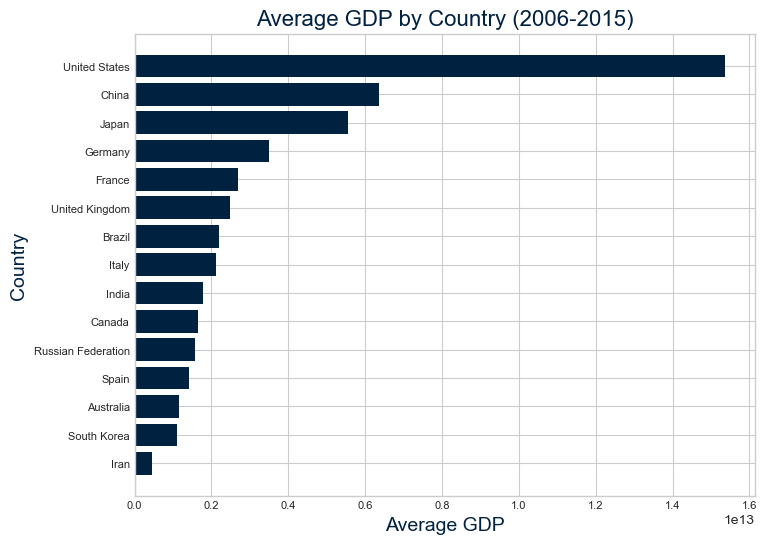

In [14]:
s = get_avgGDP().sort_values(ascending=True)

fig, ax = plt.subplots(1,1, figsize = (8,6))

plt.barh(s.index, s.values, color='#012141')
plt.title('Average GDP by Country (2006-2015)', fontsize = 16, color = '#012141')
plt.xlabel('Average GDP', fontsize = 14, color = '#012141') #
plt.ylabel('Country', fontsize = 14, color = '#012141') 
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()
#plt.xticks(rotation=45, ha='right')

## Q3)

By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP? \
NB: \
This function should return a single number.

In [15]:
def largest_avgGDP_byRank(Rank=6, start = '2006', end = '2015'):
    #check the country name of particular rank (6)
    country = get_avgGDP().index[(Rank-1)]
    #calculate the gdp_growth for the Country found with above line
    gdp_growth = df.loc[country, end] - df.loc[country, start]
    return gdp_growth

largest_avgGDP_byRank()

246702696075.3999

#### Visualization - Line Chart

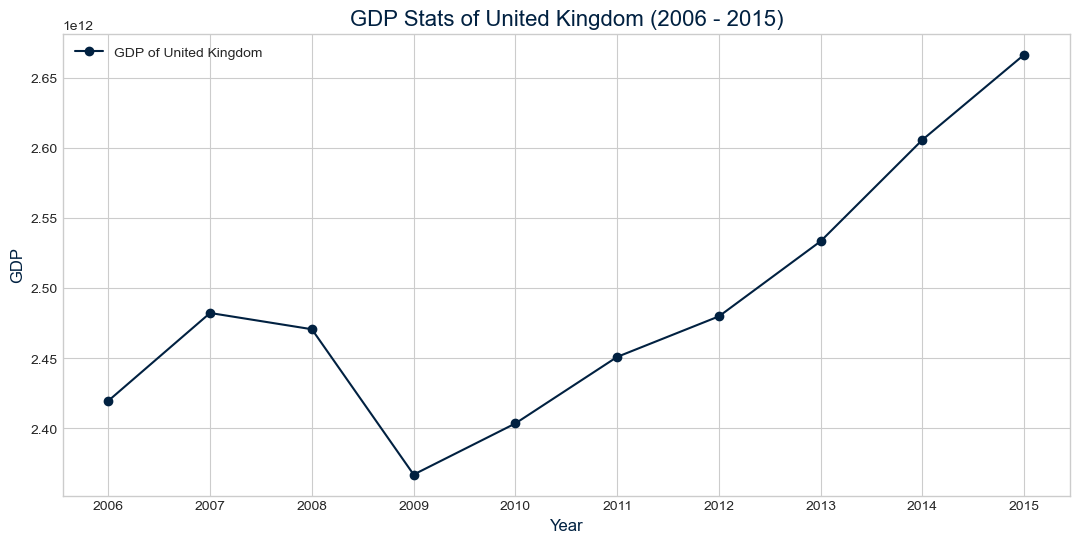

In [16]:
# Extracting the GDP values for the United States from 2006 to 2015
GDP_Rank = 6
Country = get_avgGDP().index[(GDP_Rank-1)]
years = df.columns[10:20] #[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
gdp_values = df.loc[Country, [str(year) for year in years]]

# Creating the line chart
plt.figure(figsize=(13, 6))
plt.plot(years, gdp_values, marker='o', linestyle='-', color='#012141', label=(f'GDP of {Country}'))
plt.xlabel('Year', fontsize = 12, color = '#012141')
plt.ylabel('GDP', fontsize = 12, color = '#012141')
plt.title(f'GDP Stats of {Country} (2006 - 2015)', fontsize = 16, color = '#012141')
plt.legend()
plt.grid(True)
plt.show()


## Q4)

What is the mean energy supply per capita? \
NB: \
This function should return a single number.

In [19]:
#df.columns
def mean_energy_supply_per_capita():
    return df['Energy Supply per Capita'].mean()

mean_energy_supply_per_capita()

157.6

## Q5)

Which country has the maximum % Renewable and what is the percentage? \
NB: \
This function should return a tuple with the name of the country and the percentage.

In [20]:
def country_generates_max_renewable_energy():
    renewable_energy = df.sort_values(by = '% Renewable', ascending = False).iloc[0,]
    return (renewable_energy.name, renewable_energy['% Renewable'])

country_generates_max_renewable_energy()

('Brazil', 69.64803)

#### Visualization - Horizontal Bar Chart

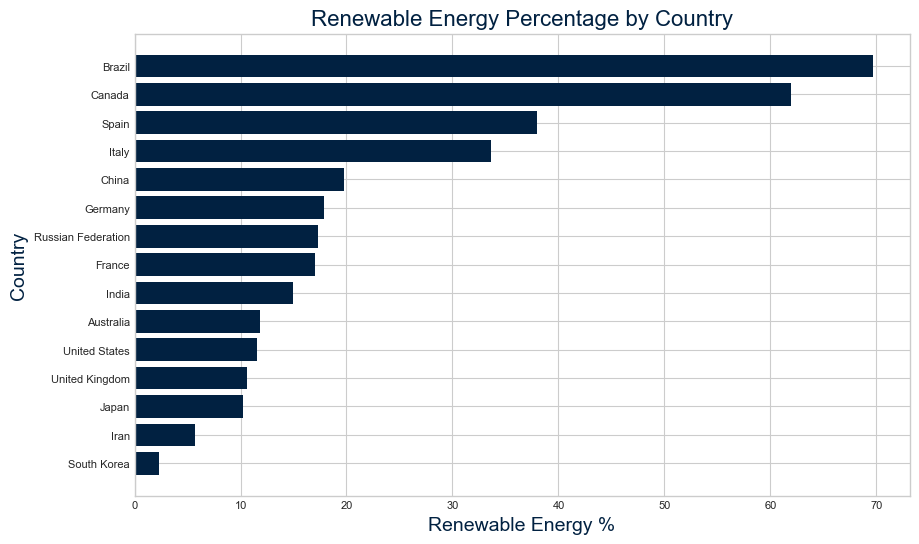

In [21]:
s = df['% Renewable'].sort_values(ascending=True)

fig, ax = plt.subplots(1,1, figsize = (10,6))
plt.barh(s.index, s.values, color='#012141')
plt.title('Renewable Energy Percentage by Country', fontsize = 16, color = '#012141')
plt.xlabel('Renewable Energy %', fontsize = 14, color = '#012141') #
plt.ylabel('Country', fontsize = 14, color = '#012141') 
plt.xticks(fontsize = 8)
#plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize = 8)
plt.show()


## Q6)

Create a new column that is the ratio of Self-Citations to Total Citations. 
-  What is the maximum value for this new column, and
-  which country has the highest ratio?

NB: \
This function should return a tuple with the name of the country and the ratio.

In [22]:
def highest_citation_ratio():
    # Create a new column for the ratio of self-citations to total citations
    df['Citation ratio'] = df['Self-citations'] / df['Citations']
    
    # Sort the DataFrame by the new column and get the row with the highest ratio
    df_citation = df.sort_values(by='Citation ratio', ascending=False).iloc[0]
    
    # Return the country with the highest ratio and the maximum value
    return (df_citation.name, df_citation['Citation ratio'])

highest_citation_ratio()

('China', 0.6893126179389422)

#### Visualization - Horizontal Bar Chart

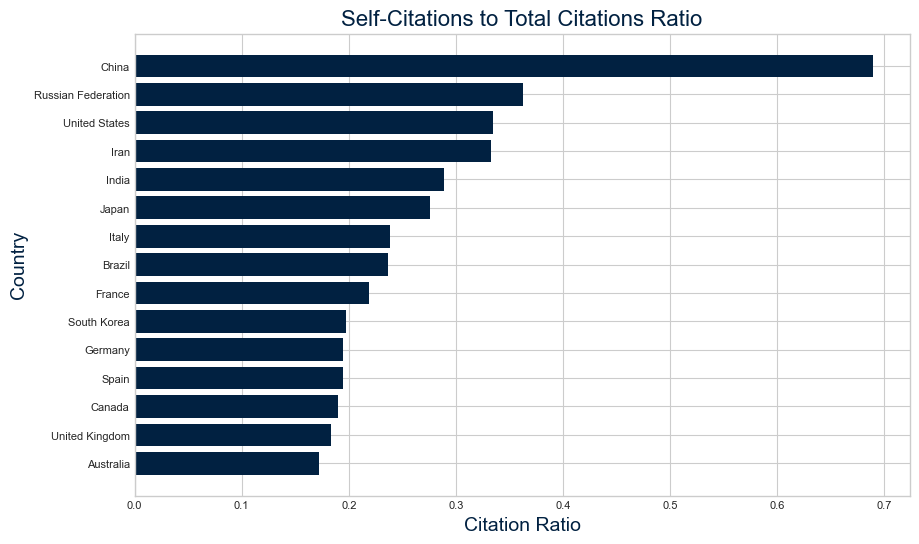

In [23]:
s = (df['Self-citations'] / (df['Citations'])).sort_values(ascending=True)

fig, ax = plt.subplots(1,1, figsize = (10,6))
plt.barh(s.index, s.values, color='#012141')
plt.title('Self-Citations to Total Citations Ratio', fontsize = 16, color = '#012141')
plt.ylabel('Country', fontsize = 14, color = '#012141') #
plt.xlabel('Citation Ratio', fontsize = 14, color = '#012141') 
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

## Q7)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
-  What is the third most populous country according to this estimate?

NB: \
This function should return a single string value.

In [24]:
def third_most_populous_country():
    # Create a column to estimate the population
    df['estimated_population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    
    # Find the third most populous country
    third_most_populou_country = df['estimated_population'].sort_values(ascending=False).index[2]
    return third_most_populou_country

third_most_populous_country()

'United States'

#### Visualization - Bar Chart

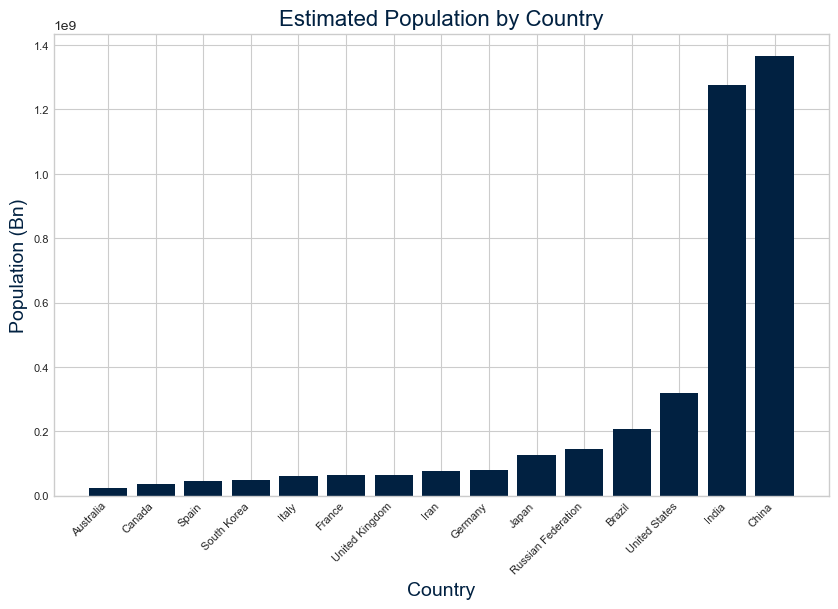

In [25]:
s = (df['Energy Supply'] / df['Energy Supply per Capita']).sort_values(ascending=True)

fig, ax = plt.subplots(1,1, figsize = (10,6))
plt.bar(s.index, s.values, color='#012141')
plt.title('Estimated Population by Country', fontsize = 16, color = '#012141')
plt.xlabel('Country', fontsize = 14, color = '#012141') #
plt.ylabel('Population (Bn)', fontsize = 14, color = '#012141') 
plt.xticks(fontsize = 8, rotation=45, ha='right')
plt.yticks(fontsize = 8)
plt.show()

In [26]:
df.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Citation ratio,estimated_population
Country,,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1367645161.290323
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,317615384.615385
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,127409395.973154
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,63870967.741935
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,143500000.0


## Q8)

Create a column that estimates the number of citable documents per person. 
-  What is the correlation between the number of citable documents per capita and the energy supply per capita? <br>Use the “.corr()” method, (Pearson's correlation).

NB: \
This function should return a single number.\
Plot to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita.

In [27]:
def citable_documents_per_person():
    # Create a column that estimates the number of citable documents per person.
    df['citable documents per person'] = df['Citable documents'] / df['estimated_population']
    
    # What is the correlation between the number of citable documents per capita and the energy supply per capita?
    # Use the “.corr()” method, (Pearson's correlation)
    correlation = df[['citable documents per person','Energy Supply per Capita']].corr(method ='pearson').iloc[0,1]
    return correlation

citable_documents_per_person()

0.7940010435442945

In [28]:
df.head(5)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Citation ratio,estimated_population,citable documents per person
Country,,,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1367645161.290323,0.000093
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,317615384.615385,0.000298
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,127409395.973154,0.000238
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,63870967.741935,0.000319
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,143500000.0,0.000128


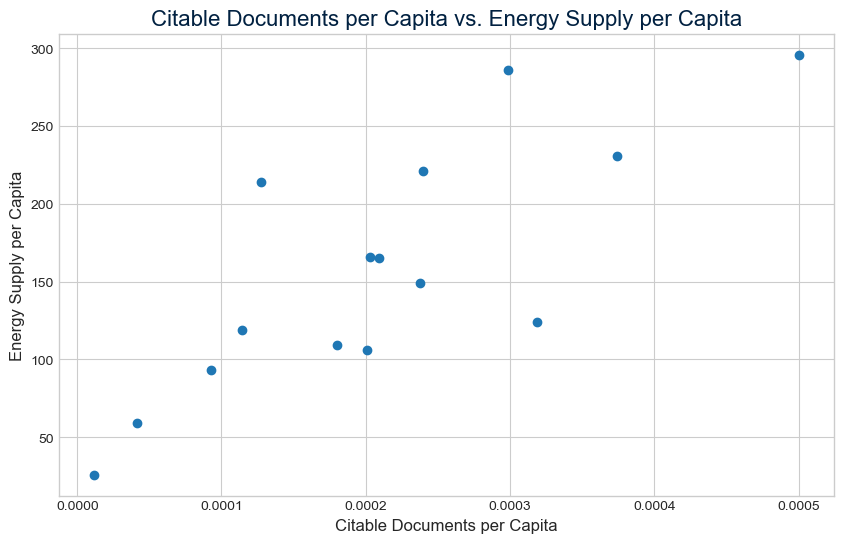

In [29]:
# Plot to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita.
plt.figure(figsize=(10, 6))

plt.scatter(df['citable documents per person'], df['Energy Supply per Capita'])
plt.title('Citable Documents per Capita vs. Energy Supply per Capita', fontsize = 16, color='#012141')
plt.xlabel('Citable Documents per Capita', fontsize = 12)
plt.ylabel('Energy Supply per Capita', fontsize = 12)
plt.show()


### Comment
##### significant positive correlation between energy supply per capita and research output suggests that higher energy availability is linked to greater academic productivity across countries


## Q9)

Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median. \
NB: \
This function should return a series named “HighRenew” whose index is the country name sorted in ascending order of rank.

In [30]:
def high_renewable():
    # Calculate the median % Renewable value for the top 15 countries
    median_renewable = df['% Renewable'].median()
    
    # Create the HighRenew column
    df['HighRenew'] = df['% Renewable'].apply(lambda x: 1 if x >= median_renewable else 0)
    
    # Return the HighRenew series sorted by the index
    high_renew_series = df['HighRenew']    
    return high_renew_series

high_renewable()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

In [31]:
df["HighRenew"].value_counts()

HighRenew
1    8
0    7
Name: count, dtype: int64

#### Visualization - Pie Chart

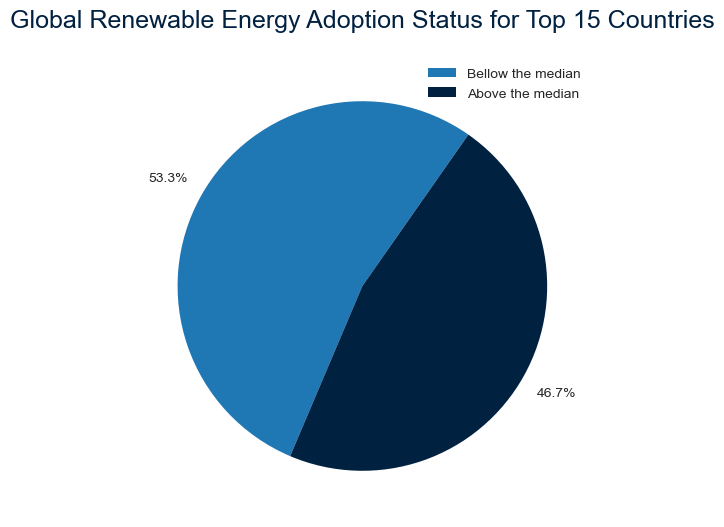

In [32]:
# Pie chart: country's % Renewable value is at or above the median for all counties in the top 15
plt.figure(figsize=(11.5, 6))
df['HighRenew'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=55, pctdistance=1.2, colors=['#1f77b4', '#012141'], labels=['', ''])
plt.title("Global Renewable Energy Adoption Status for Top 15 Countries", fontsize = 18, color = '#012141', pad = 20)
plt.legend(['Bellow the median','Above the median'])
plt.ylabel('')  # Hide the y-label
plt.show()


In [33]:
df.head(5)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Citation ratio,estimated_population,citable documents per person,HighRenew
Country,,,,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1367645161.290323,0.000093,1
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,317615384.615385,0.000298,0
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,127409395.973154,0.000238,0
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,63870967.741935,0.000319,0
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,143500000.0,0.000128,1


## Q10)

Use the following dictionary to group the Countries by Continent, \
then create a dataframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each continent.


```python
ContinentDict = {'China':'Asia','United States':'North America','Japan':'Asia','United Kingdom':'Europe',
                 'Russian Federation':'Europe','Canada':'North America','Germany':'Europe','India':'Asia',
                 'France':'Europe','South Korea':'Asia','Italy':'Europe','Spain':'Europe','Iran':'Asia',
                 'Australia':'Australia', 'Brazil':'South America'}



NB: \
This function should return a DataFrame with index named Continent \
['Asia', 'Australia', 'Europe', 'North America', 'South America'] 
and with columns ['size', 'sum', 'mean', 'std'].

In [34]:
def continent_stats():
    # Define the dictionary for continent replacements
    ContinentDict  = {
        'China':'Asia', 
        'United States':'North America', 
        'Japan':'Asia', 
        'United Kingdom':'Europe', 
        'Russian Federation':'Europe', 
        'Canada':'North America', 
        'Germany':'Europe', 
        'India':'Asia',
        'France':'Europe', 
        'South Korea':'Asia', 
        'Italy':'Europe', 
        'Spain':'Europe', 
        'Iran':'Asia',
        'Australia':'Australia', 
        'Brazil':'South America'
    }

    # Create new series 'Continent' by applying the dictionary to map countries in the index of df
    Continent = df.index.map(ContinentDict)
    # Create a DataFrame that displays the sample size, sum, mean, and standard deviation for the estimated population of each continent
    df_continent_stats = df.groupby(Continent)['estimated_population'].agg(['size', 'sum', 'mean', 'std'])
    # Set the index name to 'Continent' 
    df_continent_stats.index.name = 'Continent'
    
    return df_continent_stats

continent_stats()


,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106,579733277.32212,6.790979e+08
Australia,1,23316017.316017,23316017.316017,NaN
Europe,6,457929667.216372,76321611.202729,3.464767e+07
North America,2,352855249.48025,176427624.740125,1.996696e+08
South America,1,205915254.237288,205915254.237288,NaN


#### Visualization - Pie Chart

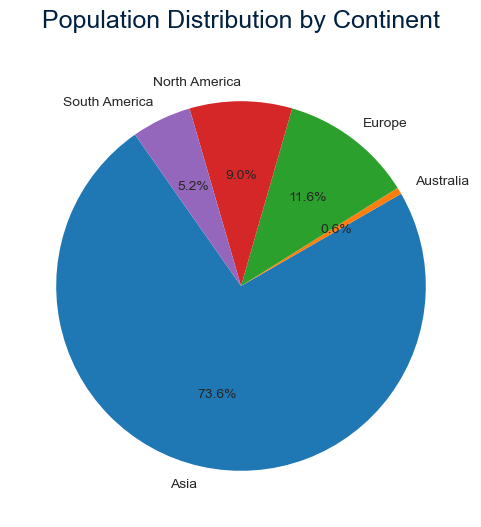

In [35]:
df_continent_stats = continent_stats()

plt.figure(figsize=(11.5, 6))
df_continent_stats['sum'].plot(kind='pie', autopct='%1.1f%%', startangle=125, color = '#012141')
plt.title('Population Distribution by Continent', fontsize = 18, color = '#012141', pad = 20)
plt.ylabel('')  # Hide the y-label
plt.show()


## Q11)

Cut % Renewable into 5 bins. \
Group Top15 by the Continent, as well as these new % Renewable bins. \
How many countries are in each of these groups? 

NB: \
This function should return a Series with a MultiIndex of ‘Continent’, then the bins for ‘% Renewable’. \
Do not include groups with no countries.

In [36]:
def group_by_continent_and_renewable_bins():
    ContinentDict  = {
        'China':'Asia', 
        'United States':'North America', 
        'Japan':'Asia', 
        'United Kingdom':'Europe', 
        'Russian Federation':'Europe', 
        'Canada':'North America', 
        'Germany':'Europe', 
        'India':'Asia',
        'France':'Europe', 
        'South Korea':'Asia', 
        'Italy':'Europe', 
        'Spain':'Europe', 
        'Iran':'Asia',
        'Australia':'Australia', 
        'Brazil':'South America'
    }
    
    # Applying the 'ContinentDict' dictionary to map countries in the index of df
    Continent = df.index.map(ContinentDict)  
    # Cut % Renewable into 5 bins
    renewable_bins = pd.qcut(df['% Renewable'],  5)
    # Group by 'Continent' and the 'renewable_bins', and calculate the size of each group
    grouped_by_continent_and_renBins = df.groupby([Continent, renewable_bins], observed=True).size()
    # Set the index name to 'Continent' 
    #grouped_by_continent_and_renBins.index.name = 'Continent'
    # Set the names of the MultiIndex levels 
    grouped_by_continent_and_renBins.index.names = ['Continent', '% Renewable Bin']
    return grouped_by_continent_and_renBins
    
group_by_continent_and_renewable_bins()

Continent      % Renewable Bin 
Asia           (2.278, 10.527]     3
               (13.706, 17.534]    1
               (17.534, 34.528]    1
Australia      (10.527, 13.706]    1
Europe         (10.527, 13.706]    1
               (13.706, 17.534]    2
               (17.534, 34.528]    2
               (34.528, 69.648]    1
North America  (10.527, 13.706]    1
               (34.528, 69.648]    1
South America  (34.528, 69.648]    1
dtype: int64

## Q12)

Convert the Population Estimate series to a string with thousands separator (using commas).\
Do not round the results. \
e.g. 317615384.61538464 -> 317,615,384.61538464


NB:\
This function should return a Series PopEst whose index is the country name and whose values are the population estimate string.

In [37]:
def change_format_of_PopEst():
    PopEst = df['estimated_population'].apply(lambda x: f'{x:,}')
    return PopEst

change_format_of_PopEst()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: estimated_population, dtype: object

#### Visualization - Bar Chart

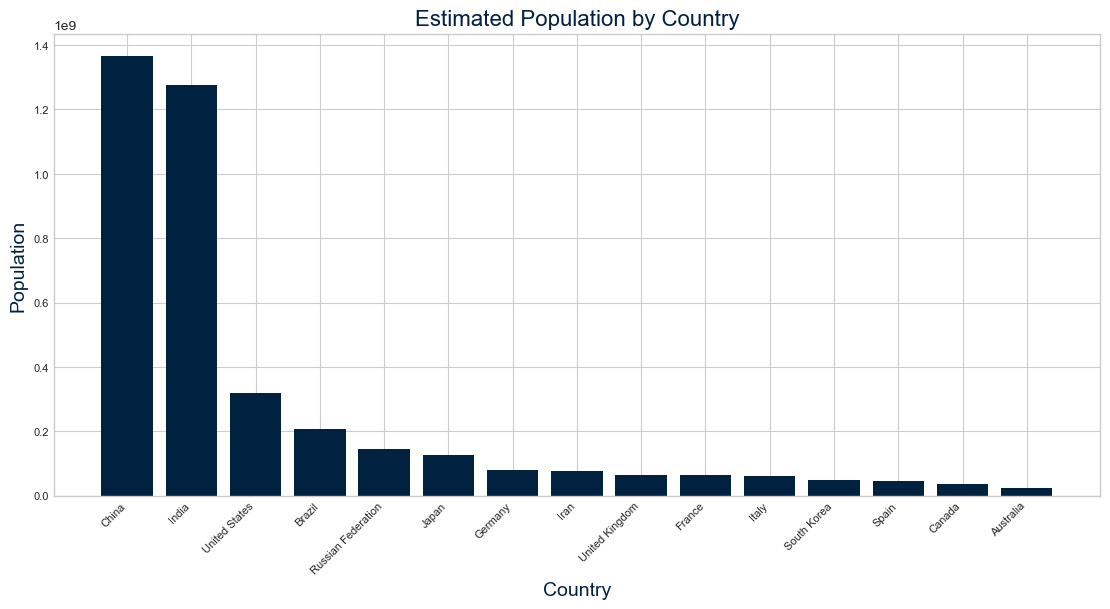

In [38]:
s = change_format_of_PopEst()
s = s.str.replace(',','').astype(float).sort_values(ascending =False)
fig, ax = plt.subplots(1,1, figsize = (13.5,6))

plt.bar(s.index, s.values, color='#012141')
plt.title('Estimated Population by Country', fontsize = 16, color = '#012141')
plt.xlabel('Country', fontsize = 14, color = '#012141') #
plt.ylabel('Population', fontsize = 14, color = '#012141') 
plt.xticks(fontsize = 8, rotation=45, ha='right')
plt.yticks(fontsize = 8)
plt.show()

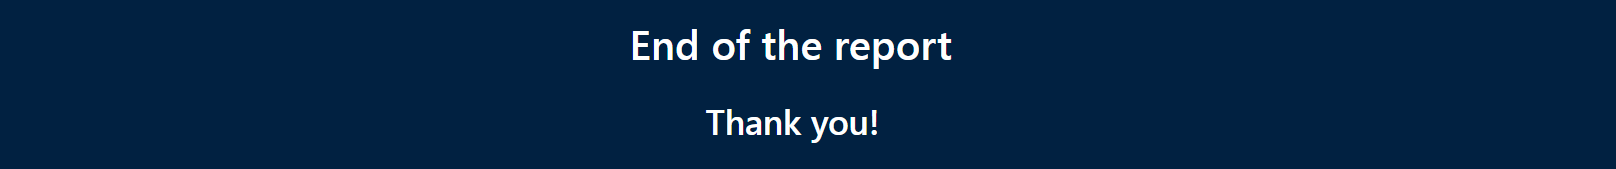